# Education and GDP

### The purpose of this project is to determine whether a relationship exists between educational attainment and GDP.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns # try to install seaborn from home
import matplotlib.pyplot as plt
%matplotlib inline  

## Data Preparation

In [3]:
url = "http://web.archive.org/web/20110514112442/http://unstats.un.org/unsd/demographic/products/socind/education.htm"
r = requests.get(url)
data = r.text
soup = BeautifulSoup(r.content)

In [5]:
table = soup.find_all('table')[6]
header_html = table.find(class_='lheader').find_all('td')
column_names = [c.text for c in header_html if len(c.text) > 0]
rows = table.find_all('tr', {'class': 'tcont'}) 
cells = [[c.text for c in row.find_all('td')] for row in rows]

In [6]:
countries_df = pd.DataFrame(cells)
cleaned_df = countries_df.drop([2, 3, 5, 6, 8, 9, 11], axis=1)
cleaned_df.columns = column_names
cleaned_df = cleaned_df[cleaned_df.Total.notnull()]

In [7]:
for col in cleaned_df:
    print(col, cleaned_df[col].dtypes)
    
cleaned_df['Total'] = cleaned_df['Total'].astype('int64')
cleaned_df['Men'] = cleaned_df['Men'].astype('int64')
cleaned_df['Women'] = cleaned_df['Women'].astype('int64')

Country or area object
Year object
Total object
Men object
Women object


In [9]:
cleaned_df['Total'].mean()

12.333333333333334

In [10]:
cleaned_df['Women'].mean()

12.451612903225806

In [11]:
cleaned_df['Men'].mean()

12.258064516129032

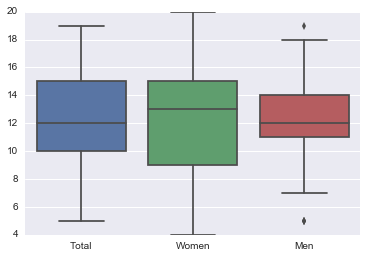

In [8]:
sns.boxplot(cleaned_df[["Total", "Women", "Men"]])

### The figure above depicts the distribution of educational life expectancy for women and men in the UN data. Although men and women achieve, on average, approximately 12 years of education, the boxplots above show the distributions of educational attainment differs. There is a larger range of possible values among women as well as much greater spread of data around the mean when compared to the distribution of years of education among men.  

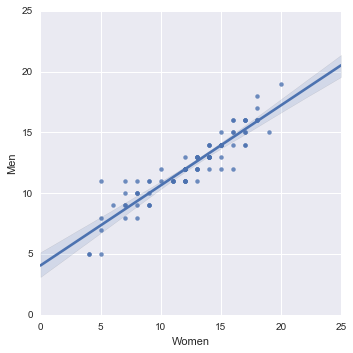

In [12]:
sns.lmplot('Women', 'Men', data=cleaned_df, fit_reg=True)

### The scatterplot above shows that there is a positive correlation between men's and women's educational life expectancy, suggesting that women and men achieve somewhat comparable levels of education within countries.